In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("C:\\Users\\allup\\OneDrive\\Desktop\\allu\\titanic data.xlsx")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
import numpy as np

df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

df['Cabin_null'].mean()

0.7710437710437711

In [6]:
df['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int32

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [8]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

In [9]:
df = pd.read_excel("C:\\Users\\allup\\OneDrive\\Desktop\\allu\\titanic data.xlsx",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [11]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [12]:
median = df.Age.median()
median

28.0

In [13]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [14]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

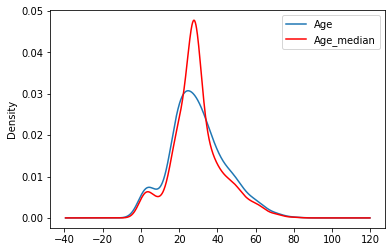

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind = 'kde',ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## random sample imputation

In [19]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [20]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [21]:
df['Age'].isnull().sum()

177

In [22]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [23]:
   def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df['Age'].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [24]:
median=df.Age.median()

In [25]:
median

28.0

In [26]:
impute_nan(df,"Age",median)

In [27]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

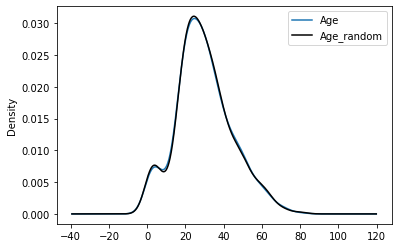

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind = 'kde',ax=ax, color='black')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## caputuring the missing values new values##

In [36]:
import pandas as pd
df=pd.read_excel("C:\\Users\\allup\\OneDrive\\Desktop\\allu\\titanic data.xlsx",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [37]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [38]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [39]:
df.Age.median()

28.0

In [41]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## end of distribution imputaion##

In [43]:
import pandas as pd
df=pd.read_excel("C:\\Users\\allup\\OneDrive\\Desktop\\allu\\titanic data.xlsx",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

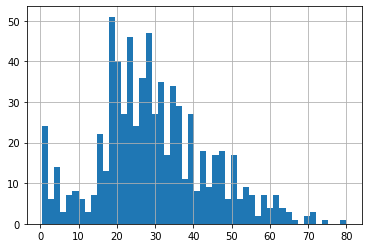

In [45]:
df.Age.hist(bins=50)

In [47]:
df.Age.mean()+3*df.Age.std()

73.27860964406094

In [67]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna('extreme')
    df[variable].fillna(median,inplace=True)

In [68]:
impute_nan(df,'Age',df.Age.median(),'extreme')
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

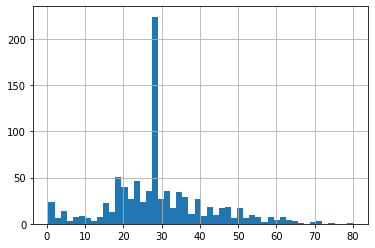

In [69]:
df['Age'].hist(bins=50)

<AxesSubplot:>

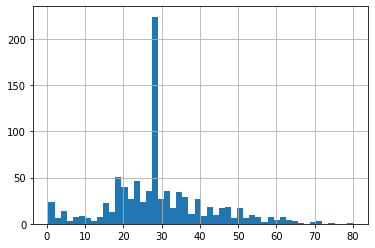

In [70]:
df['Age_end_distribution'].hist(bins=50)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

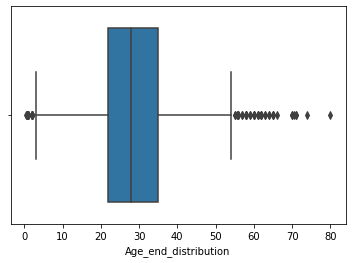

In [65]:
import seaborn as sns 
sns.boxplot('Age_end_distribution',data=df)

## arbitarary value imputation ##

In [72]:
df=pd.read_excel("C:\\Users\\allup\\OneDrive\\Desktop\\allu\\titanic data.xlsx",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [75]:
def impute_nan(df,variable):
    df[variable+"_zero"]=df[variable].fillna(0)
    df[variable+"_hundrad"]=df[variable].fillna(100)

<AxesSubplot:>

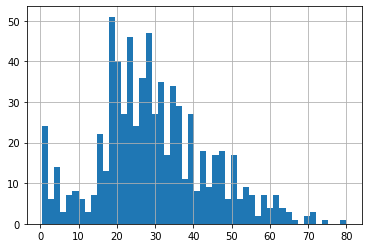

In [74]:
df['Age'].hist(bins=50)